In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_transaction = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_transaction.csv")
train_identity = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_identity.csv")
test_transaction = pd.read_csv("/kaggle/input/ieee-fraud-detection/test_transaction.csv")
test_identity = pd.read_csv("/kaggle/input/ieee-fraud-detection/test_identity.csv")

In [4]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
missing_val = train_transaction.isna().sum()
missing_val
print ("% of missing data = ",(missing_val.sum()/np.product(train_transaction.shape)) * 100)

% of missing data =  41.073431200111266


In [7]:
missing_val = train_identity.isna().sum()
missing_val
print ("% of missing data = ",(missing_val.sum()/np.product(train_identity.shape)) * 100)

% of missing data =  35.58109650830896


In [8]:
missing_val = test_transaction.isna().sum()
missing_val
print ("% of missing data = ",(missing_val.sum()/np.product(test_transaction.shape)) * 100)

% of missing data =  36.90570194240822


In [9]:
train_data = train_transaction.merge(train_identity, how="left", on="TransactionID")

test_data = test_transaction.merge(test_identity, how="left", on="TransactionID")

In [10]:
train_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [11]:
test_data.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_data.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [13]:
test_data.isnull().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
                   ...  
id-36             369714
id-37             369714
id-38             369714
DeviceType        369760
DeviceInfo        391634
Length: 433, dtype: int64

In [14]:
test_data= test_data.rename(columns=lambda x:"_".join(x.split("-")))

In [15]:
print(f"Number of columns with missing values are {train_data.isnull().any().sum()}")

Number of columns with missing values are 414


In [16]:
test_data.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [18]:
test_data= test_data.rename(columns=lambda x:"_".join(x.split("-")))

In [19]:


DeviceType_Count = train_data['DeviceType'].value_counts()
DeviceType_Count

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

<AxesSubplot: xlabel='DeviceType', ylabel='count'>

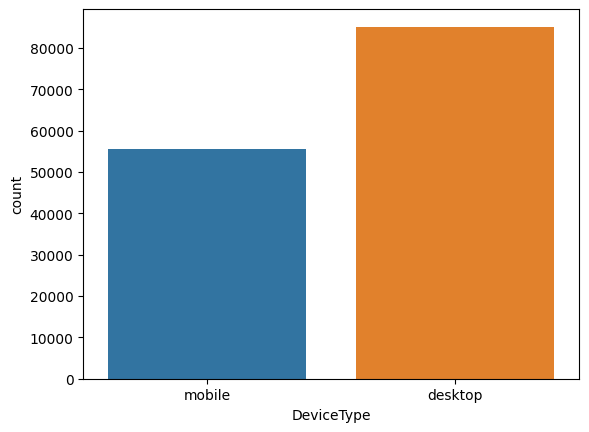

In [20]:
sns.countplot(x=train_data["DeviceType"])

In [21]:
train_data['DeviceInfo'].value_counts()

Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
               ...  
LGMS345            1
verykool           1
XT1072             1
LG-H931            1
0PJA2              1
Name: DeviceInfo, Length: 1786, dtype: int64

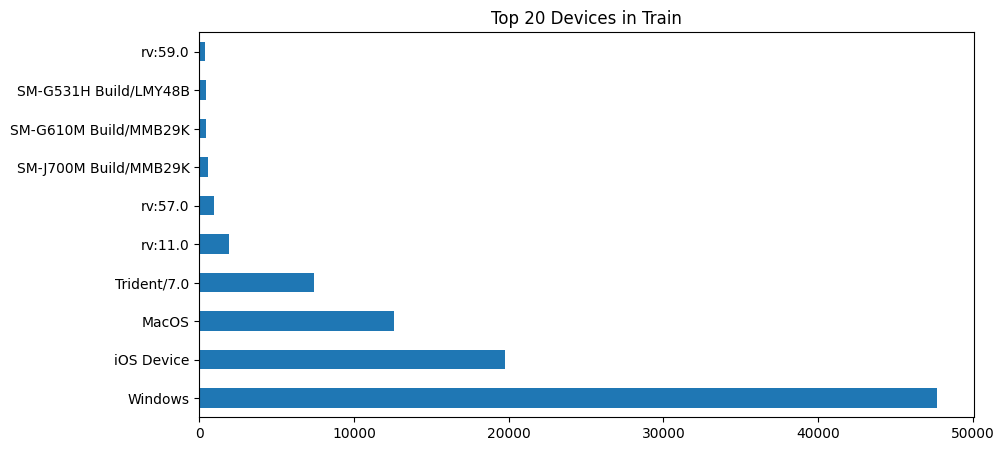

In [22]:
train_data['DeviceInfo'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), title='Top 20 Devices in Train')
plt.show()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

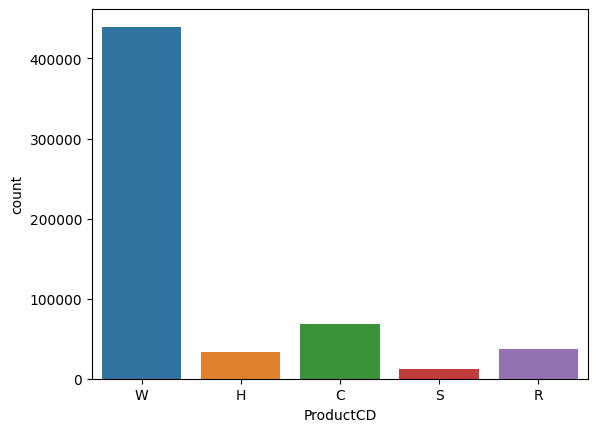

In [23]:
#ProductCD - Product Code - May not be an actual product - can be a service too
sns.countplot(x=train_data['ProductCD'])

train_data['ProductCD'].value_counts()

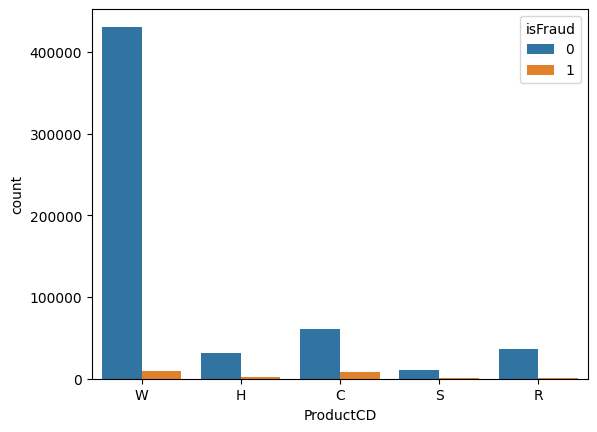

In [24]:
sns.countplot(data=train_data,x='ProductCD',hue='isFraud')
plt.show()

In [25]:
# addr1-addr2: Address, billing region and billing country
train_data['addr1'].value_counts().head(10)

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
Name: addr1, dtype: int64

In [26]:
train_data['addr2'].value_counts().head(10)

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
16.0        55
31.0        47
19.0        33
26.0        25
27.0        20
Name: addr2, dtype: int64

In [27]:
train_data['P_emaildomain'].value_counts()[:10]
#P_ and (R__) emaildomain: Purchaser and recipient email domain, some transactions do not require the recipient, and the corresponding Remaildomain is empty

gmail.com        228355
yahoo.com        100934
hotmail.com       45250
anonymous.com     36998
aol.com           28289
comcast.net        7888
icloud.com         6267
outlook.com        5096
msn.com            4092
att.net            4033
Name: P_emaildomain, dtype: int64

In [28]:
train_data['R_emaildomain'].value_counts()[:10]

gmail.com        57147
hotmail.com      27509
anonymous.com    20529
yahoo.com        11842
aol.com           3701
outlook.com       2507
comcast.net       1812
yahoo.com.mx      1508
icloud.com        1398
msn.com            852
Name: R_emaildomain, dtype: int64

In [29]:
isfraud_Pemail = train_data.groupby("P_emaildomain")["isFraud"].sum()
isfraud_Pemail

P_emaildomain
aim.com               40
anonymous.com        859
aol.com              617
att.net               30
bellsouth.net         53
cableone.net           3
centurylink.net        0
cfl.rr.com             0
charter.net           25
comcast.net          246
cox.net               29
earthlink.net         11
embarqmail.com         9
frontier.com           8
frontiernet.net        5
gmail                 11
gmail.com           9943
gmx.de                 0
hotmail.co.uk          0
hotmail.com         2396
hotmail.de             0
hotmail.es            20
hotmail.fr             0
icloud.com           197
juno.com               6
live.com              84
live.com.mx           41
live.fr                0
mac.com               14
mail.com             106
me.com                27
msn.com               90
netzero.com            0
netzero.net            1
optonline.net         17
outlook.com          482
outlook.es            57
prodigy.net.mx         1
protonmail.com        31
ptd.net    

In [30]:
isfraud_Remail = train_data.groupby("R_emaildomain")["isFraud"].sum()
isfraud_Remail

R_emaildomain
aim.com                1
anonymous.com        598
aol.com              129
att.net                0
bellsouth.net          2
cableone.net           0
centurylink.net        0
cfl.rr.com             0
charter.net            5
comcast.net           21
cox.net               11
earthlink.net          6
embarqmail.com         0
frontier.com           0
frontiernet.net        0
gmail                  0
gmail.com           6811
gmx.de                 0
hotmail.co.uk          0
hotmail.com         2140
hotmail.de             0
hotmail.es            20
hotmail.fr             0
icloud.com           180
juno.com               0
live.com              38
live.com.mx           44
live.fr                0
mac.com                2
mail.com              46
me.com                11
msn.com                1
netzero.com            0
netzero.net            2
optonline.net          2
outlook.com          414
outlook.es            57
prodigy.net.mx         1
protonmail.com        39
ptd.net    

In [31]:
card_cols = [c for c in train_data.columns if 'card' in c]
train_data[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [32]:
for col in card_cols:
    print(col+'  : ' + str(train_data[col].nunique()))

card1  : 13553
card2  : 500
card3  : 114
card4  : 4
card5  : 119
card6  : 4


visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

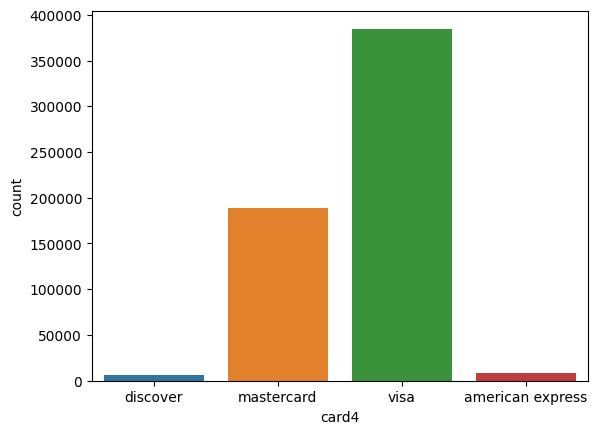

In [33]:
sns.countplot(x=train_data["card4"])

train_data["card4"].value_counts()

#Highest card used is Visa

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

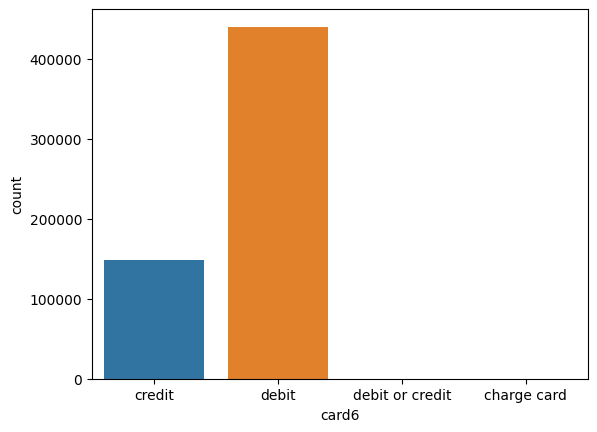

In [34]:
sns.countplot(x=train_data["card6"])

train_data["card6"].value_counts()

#Mostly debit cards are used

In [35]:
c_cols = [c for c in train_data if c[0] == 'C']
train_data[c_cols].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [36]:
#C1-C14: Counting, such as how many addresses are found to be associated with the payment card, etc.

In [37]:
train_data[c_cols].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [38]:
d_cols = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14']
train_data[d_cols].head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


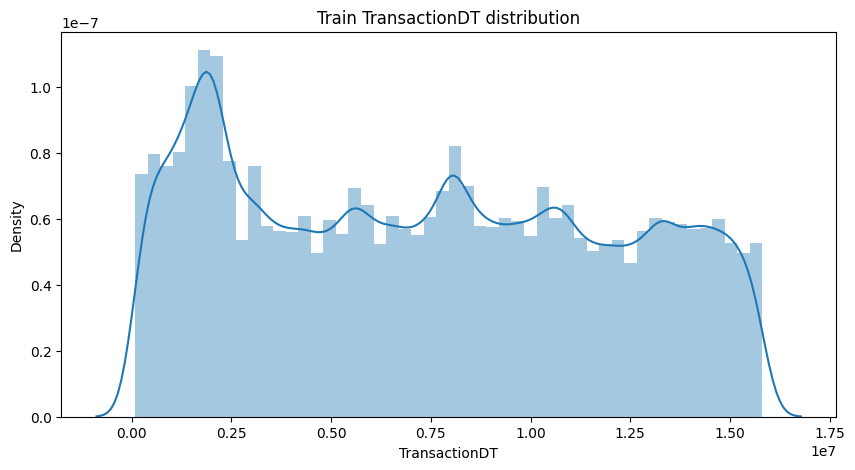

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(train_data["TransactionDT"])
plt.title('Train TransactionDT distribution')
plt.show()
#D1-D15: Timedelta, such as days between previous transaction, etc.
#TransactionDT: Timedelta from a given reference datetime (not an actual timestamp), but the time difference in seconds from a certain time.

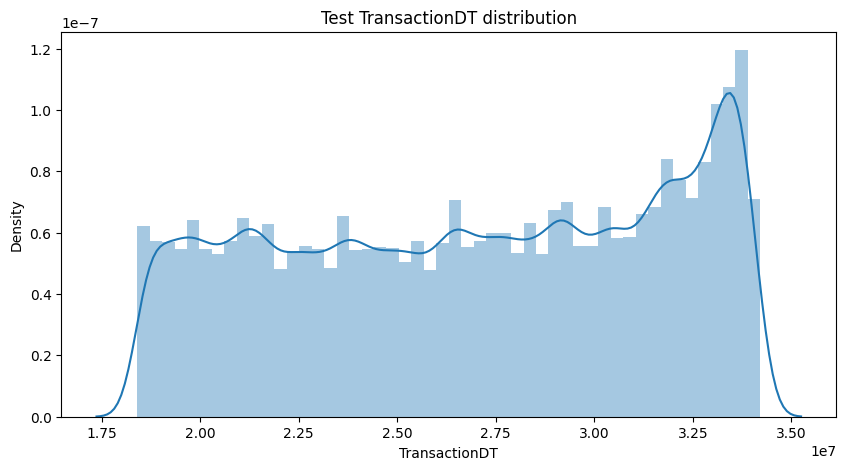

In [40]:
plt.figure(figsize=(10,5))
sns.distplot(test_data["TransactionDT"])
plt.title('Test TransactionDT distribution')
plt.show()

In [41]:
(np.sum(pd.isnull(train_data)).sort_values(ascending=False)/len(train_data))*100

id_24            99.196159
id_25            99.130965
id_07            99.127070
id_08            99.127070
id_21            99.126393
                   ...    
C3                0.000000
C2                0.000000
C1                0.000000
isFraud           0.000000
TransactionID     0.000000
Length: 434, dtype: float64

In [42]:
A = (np.sum(pd.isnull(train_data)).sort_values(ascending=False)/len(train_data))*100
Removed_col = A[A>0.4].index
train_data.drop(columns=Removed_col, inplace=True)

In [43]:
train_data.shape

(590540, 110)

In [44]:
A = (np.sum(pd.isnull(test_data)).sort_values(ascending=False)/len(test_data))*100
Removed_col = A[A>0.4].index
test_data.drop(columns=Removed_col, inplace=True)

In [45]:
test_data.shape

(506691, 93)

0    569877
1     20663
Name: isFraud, dtype: int64

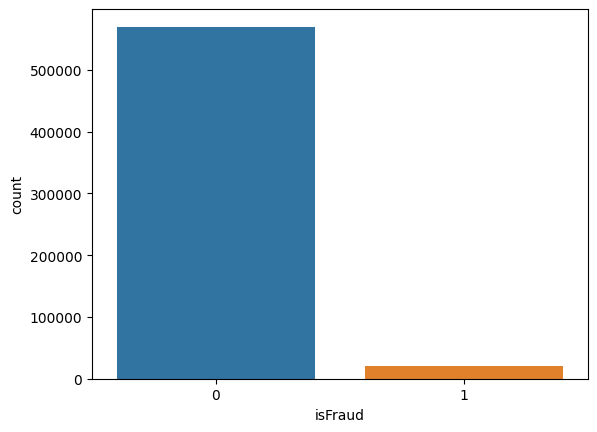

In [46]:
sns.countplot(x=train_data['isFraud'])

train_data['isFraud'].value_counts()

In [47]:
# Train data
#For numerical value imputation
for i in train_data.columns:
    if train_data[i].dtypes=='int64' or train_data[i].dtypes=='float64':
        train_data[i].fillna(train_data[i].mean(),inplace=True)
        
#For categorical value imputation
for i in train_data.columns:
    if train_data[i].dtypes=='object':
        train_data[i].fillna(train_data[i].mode()[0],inplace=True)
        
# Test data
#For numerical value imputation
for i in test_data.columns:
    if test_data[i].dtypes=='int64' or test_data[i].dtypes=='float64':
        test_data[i].fillna(test_data[i].mean(),inplace=True)
        
#For categorical value imputation
for i in test_data.columns:
    if test_data[i].dtypes=='object':
        test_data[i].fillna(test_data[i].mode()[0],inplace=True)

In [48]:
data = pd.concat([train_data, test_data])

In [49]:
df = pd.get_dummies(data,dummy_na=True,drop_first=True)

In [50]:
df.drop(columns = 'TransactionID', inplace = True)

In [51]:
df.dropna(inplace=True,axis=0)

In [52]:
X = df.drop('isFraud',axis=1).values.astype(np.float)
y = df['isFraud'].values.astype(np.float)

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from tensorflow.keras.models import Sequential

In [57]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [58]:
dropout=0.5

model = Sequential()
model.add(Dense(250,activation='relu',kernel_regularizer=regularizers.l1(l1=0.00001)))
model.add(Dropout(dropout))
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l1(l1=0.00001)))
model.add(Dropout(dropout))
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(l2=0.0001)))
model.add(Dropout(dropout))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor='val_loss',patience=4,verbose=2)

In [61]:
r = model.fit(X_train, y_train,epochs = 10,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/10
14764/14764 [==============================] - 60s 4ms/step - loss: 0.1491 - accuracy: 0.9650 - val_loss: 0.1401 - val_accuracy: 0.9649
Epoch 2/10
14764/14764 [==============================] - 55s 4ms/step - loss: 0.1395 - accuracy: 0.9650 - val_loss: 0.1338 - val_accuracy: 0.9649
Epoch 3/10
14764/14764 [==============================] - 59s 4ms/step - loss: 0.1383 - accuracy: 0.9650 - val_loss: 0.1325 - val_accuracy: 0.9649
Epoch 4/10
14764/14764 [==============================] - 62s 4ms/step - loss: 0.1376 - accuracy: 0.9650 - val_loss: 0.1326 - val_accuracy: 0.9649
Epoch 5/10
14764/14764 [==============================] - 61s 4ms/step - loss: 0.1376 - accuracy: 0.9650 - val_loss: 0.1323 - val_accuracy: 0.9649
Epoch 6/10
14764/14764 [==============================] - 58s 4ms/step - loss: 0.1373 - accuracy: 0.9650 - val_loss: 0.1317 - val_accuracy: 0.9649
Epoch 7/10
14764/14764 [==============================] - 56s 4ms/step - loss: 0.1371 - accuracy: 0.9650 - val_loss: 0

In [62]:
model_loss = pd.DataFrame(model.history.history)

In [63]:
model_loss

,loss,accuracy,val_loss,val_accuracy
0,0.149058,0.965030,0.140128,0.964854
1,0.139520,0.965049,0.133820,0.964854
2,0.138261,0.965049,0.132519,0.964854
3,0.137565,0.965049,0.132616,0.964854
4,0.137628,0.965049,0.132322,0.964854
5,0.137254,0.965049,0.131653,0.964854
6,0.137090,0.965049,0.133341,0.964854
7,0.136881,0.965049,0.131692,0.964854
8,0.137232,0.965049,0.131872,0.964854
9,0.136902,0.965049,0.131492,0.964854


In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               29750     
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [65]:
loss, acc = model.evaluate(X_test,y_test, verbose=2)
print('Test Accuracy: %.5f' % acc)

3691/3691 - 6s - loss: 0.1315 - accuracy: 0.9649 - 6s/epoch - 2ms/step
Test Accuracy: 0.96485


In [66]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
X_test

array([[8.77180647e-01, 4.61813425e-04, 7.31991952e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.74450037e-02, 8.04674432e-04, 5.86720322e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.57120523e-01, 1.36984714e-03, 3.97700489e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.39254833e-01, 3.37221805e-03, 1.00833573e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.18614322e-01, 1.39257617e-02, 2.88473699e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.05015832e-02, 2.58943036e-03, 4.88588675e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [68]:
pred = model.predict(X_test)

3691/3691 [==============================] - 6s 2ms/step


In [69]:
pred.shape

(118108, 1)

In [70]:
pred


array([[0.05123056],
       [0.01902871],
       [0.03159242],
       ...,
       [0.03805435],
       [0.16199613],
       [0.01243322]], dtype=float32)

In [71]:
model.save('./model_deep.h5')

In [72]:
pred

array([[0.05123056],
       [0.01902871],
       [0.03159242],
       ...,
       [0.03805435],
       [0.16199613],
       [0.01243322]], dtype=float32)

In [73]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
predictions_classes = []
for i in predictions:
    prediction_class = np.argmax(i)
    predictions_classes.append(prediction_class)

cm = confusion_matrix(y_test, predictions_classes)
print(cm)

3691/3691 [==============================] - 6s 2ms/step
[[113957      0]
 [  4151      0]]
